In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datasets=pd.read_csv('/content/diabetes.csv')
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
datasets.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
datasets.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
datasets.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
datasets.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#dropping missing values
datasets_cleaned=datasets.dropna(inplace=True)


3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.

In [ ]:

X = datasets.drop(columns=['Outcome'])
y = datasets['Outcome']

def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_split_size = int(len(X) * test_size)

    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


# 4. Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
• Compute distances using Euclidean distance.
• Write functions for:
– Predicting the class for a single query.
– Predicting classes for all test samples.
• Evaluate the performance using accuracy.


In [ ]:
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def predict_single_query(X_train, y_train, query, k=3):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(query, X_train.iloc[i])
        distances.append((dist, y_train.iloc[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest_neighbors = distances[:k]
    neighbor_classes = [neighbor[1] for neighbor in k_nearest_neighbors]
    return max(set(neighbor_classes), key=neighbor_classes.count)

def predict_all(X_train, y_train, X_test, k=3):
    predictions = []
    for i in range(len(X_test)):
        prediction = predict_single_query(X_train, y_train, X_test.iloc[i], k)
        predictions.append(prediction)
    return np.array(predictions)

def calculate_accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

k = 5
y_pred = predict_all(X_train, y_train, X_test, k)
accuracy = calculate_accuracy(y_test.values, y_pred)
print(f"Accuracy of KNN (k={k}): {accuracy:.2f}")

Accuracy of KNN (k=5): 0.69


In [ ]:
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    return X_train, X_test, y_train, y_test

def scale_features(X_train, X_test):
    mean = X_train.mean(axis=0)
    std = X_train.std(axis=0)
    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std
    return X_train_scaled, X_test_scaled

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def predict_single_query(X_train, y_train, query, k=3):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(query, X_train.iloc[i])
        distances.append((dist, y_train.iloc[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest_neighbors = distances[:k]
    neighbor_classes = [neighbor[1] for neighbor in k_nearest_neighbors]
    return max(set(neighbor_classes), key=neighbor_classes.count)

def predict_all(X_train, y_train, X_test, k=3):
    predictions = []
    for i in range(len(X_test)):
        prediction = predict_single_query(X_train, y_train, X_test.iloc[i], k)
        predictions.append(prediction)
    return np.array(predictions)

def calculate_accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)
X_train_scaled, X_test_scaled = scale_features(X_train, X_test)

k = 5
y_pred = predict_all(X_train_scaled, y_train, X_test_scaled, k)
accuracy = calculate_accuracy(y_test.values, y_pred)
print(f"Accuracy of kNN with scaled data (k={k}): {accuracy:.2f}")

Accuracy of kNN with scaled data (k=5): 0.70


2. Comparative Analysis: Compare the Results -
• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.
• Discuss:
– How scaling impacted the KNN performance.
– The reason for any observed changes in accuracy.


In [ ]:
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    return X_train, X_test, y_train, y_test

# Scaling Function
def scale_features(X_train, X_test):
    mean = X_train.mean(axis=0)
    std = X_train.std(axis=0)
    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std
    return X_train_scaled, X_test_scaled

# Euclidean Distance Function
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# kNN Prediction Function for Single Query
def predict_single_query(X_train, y_train, query, k=3):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(query, X_train.iloc[i])
        distances.append((dist, y_train.iloc[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest_neighbors = distances[:k]
    neighbor_classes = [neighbor[1] for neighbor in k_nearest_neighbors]
    return max(set(neighbor_classes), key=neighbor_classes.count)

# kNN Prediction Function for All Test Samples
def predict_all(X_train, y_train, X_test, k=3):
    predictions = []
    for i in range(len(X_test)):
        prediction = predict_single_query(X_train, y_train, X_test.iloc[i], k)
        predictions.append(prediction)
    return np.array(predictions)

# Accuracy Calculation Function
def calculate_accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# Train and test on original (non-scaled) data
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)
k = 5
y_pred_original = predict_all(X_train, y_train, X_test, k)
accuracy_original = calculate_accuracy(y_test.values, y_pred_original)

# Train and test on scaled data
X_train_scaled, X_test_scaled = scale_features(X_train, X_test)
y_pred_scaled = predict_all(X_train_scaled, y_train, X_test_scaled, k)
accuracy_scaled = calculate_accuracy(y_test.values, y_pred_scaled)

# Print results for comparison
print(f"Accuracy on original data (k={k}): {accuracy_original:.2f}")
print(f"Accuracy on scaled data (k={k}): {accuracy_scaled:.2f}")

Accuracy on original data (k=5): 0.69
Accuracy on scaled data (k=5): 0.70


Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:
k= 1, 2, 3, . . . 15
• For each k, record:
– Accuracy.
– Time taken to make predictions.


In [ ]:
import time
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    return X_train, X_test, y_train, y_test

def scale_features(X_train, X_test):
    mean = X_train.mean(axis=0)
    std = X_train.std(axis=0)
    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std
    return X_train_scaled, X_test_scaled

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def predict_single_query(X_train, y_train, query, k=3):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(query, X_train.iloc[i])
        distances.append((dist, y_train.iloc[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest_neighbors = distances[:k]
    neighbor_classes = [neighbor[1] for neighbor in k_nearest_neighbors]
    return max(set(neighbor_classes), key=neighbor_classes.count)

def predict_all(X_train, y_train, X_test, k=3):
    predictions = []
    for i in range(len(X_test)):
        prediction = predict_single_query(X_train, y_train, X_test.iloc[i], k)
        predictions.append(prediction)
    return np.array(predictions)

def calculate_accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

k_values = range(1, 16)
results = {'k': [], 'Accuracy_original': [], 'Time_original': [], 'Accuracy_scaled': [], 'Time_scaled': []}

for k in k_values:
    start_time = time.time()
    y_pred_original = predict_all(X_train, y_train, X_test, k)
    accuracy_original = calculate_accuracy(y_test.values, y_pred_original)
    time_original = time.time() - start_time

    start_time = time.time()
    X_train_scaled, X_test_scaled = scale_features(X_train, X_test)
    y_pred_scaled = predict_all(X_train_scaled, y_train, X_test_scaled, k)
    accuracy_scaled = calculate_accuracy(y_test.values, y_pred_scaled)
    time_scaled = time.time() - start_time

    results['k'].append(k)
    results['Accuracy_original'].append(accuracy_original)
    results['Time_original'].append(time_original)
    results['Accuracy_scaled'].append(accuracy_scaled)
    results['Time_scaled'].append(time_scaled)

results_df = pd.DataFrame(results)
print(results_df)

     k  Accuracy_original  Time_original  Accuracy_scaled  Time_scaled
0    1           0.686957      41.049769         0.634783    37.890798
1    2           0.726087      40.690691         0.660870    38.054978
2    3           0.673913      40.729506         0.708696    37.541745
3    4           0.721739      40.055505         0.686957    36.985827
4    5           0.686957      39.808085         0.700000    36.845257
5    6           0.700000      39.816471         0.691304    37.055245
6    7           0.691304      40.167624         0.695652    36.848963
7    8           0.713043      39.810148         0.686957    37.015200
8    9           0.700000      40.369881         0.695652    36.174053
9   10           0.717391      40.370472         0.695652    36.306677
10  11           0.730435      40.619165         0.708696    36.373764
11  12           0.739130      40.134746         0.721739    36.843556
12  13           0.743478      40.074888         0.713043    37.113021
13  14

2. Visualize the Results:
• Plot the following graphs:
– k vs. Accuracy for original and scaled datasets.
– k vs. Time Taken for original and scaled datasets.

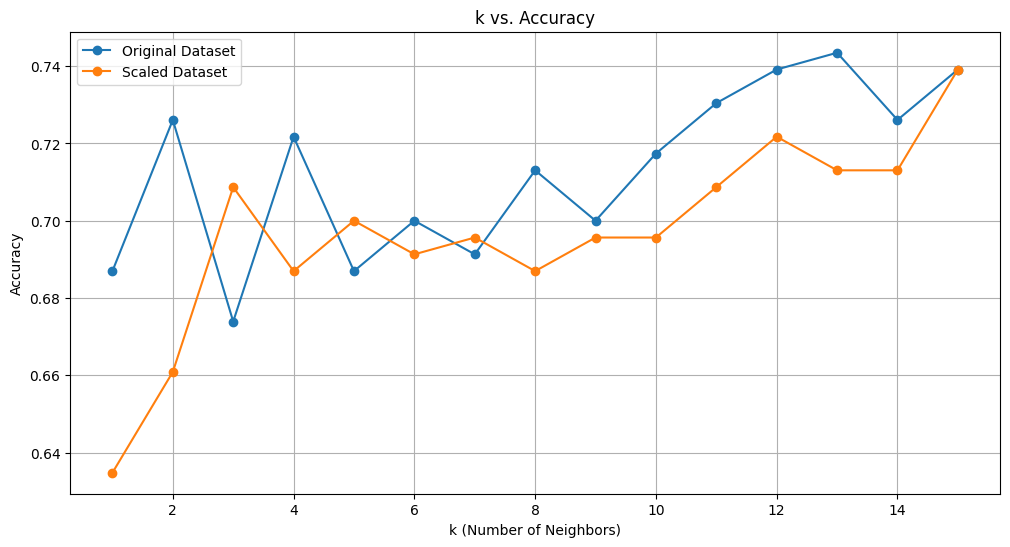

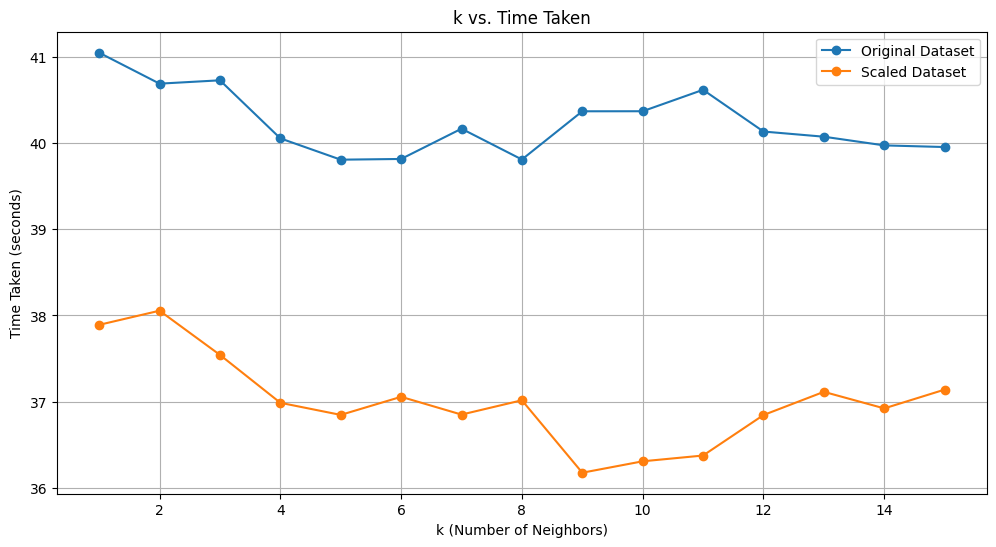

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(results_df['k'], results_df['Accuracy_original'], label='Original Dataset', marker='o')
plt.plot(results_df['k'], results_df['Accuracy_scaled'], label='Scaled Dataset', marker='o')
plt.title('k vs. Accuracy')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(results_df['k'], results_df['Time_original'], label='Original Dataset', marker='o')
plt.plot(results_df['k'], results_df['Time_scaled'], label='Scaled Dataset', marker='o')
plt.title('k vs. Time Taken')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time Taken (seconds)')
plt.legend()
plt.grid(True)
plt.show()

3. Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost.
• Identify the optimal k based on your analysis.


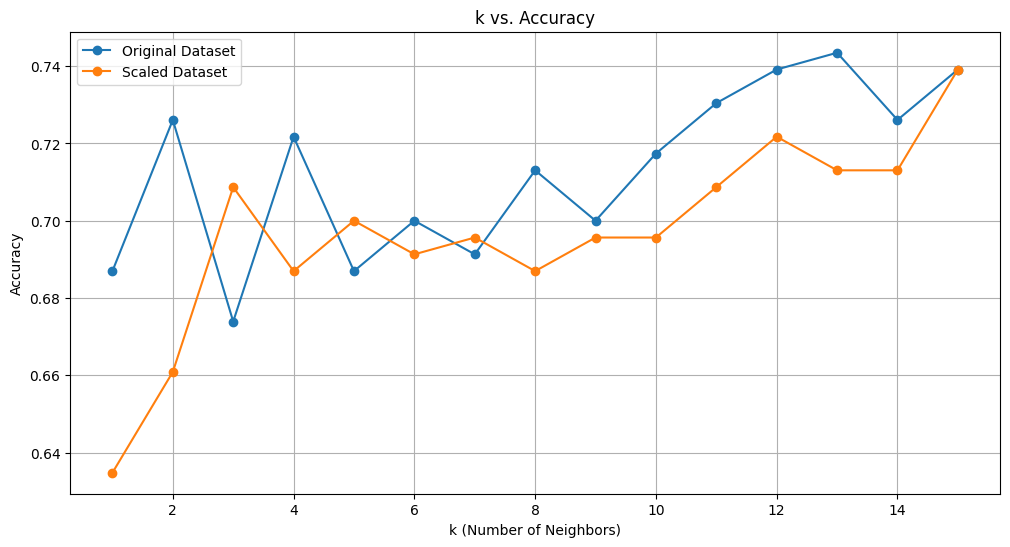

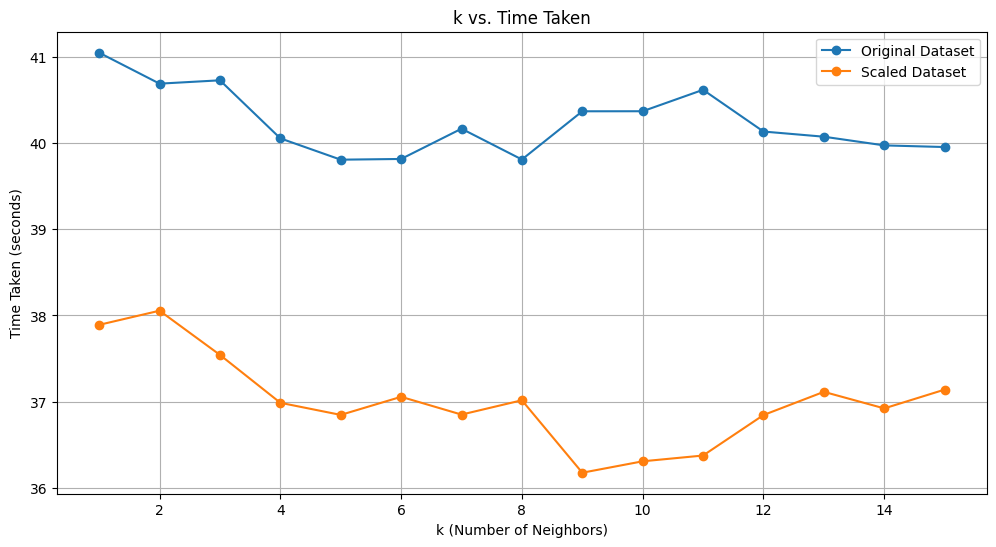

Optimal k based on Accuracy for Original Dataset: 13.0
Optimal k based on Accuracy for Scaled Dataset: 15.0
Optimal k based on Time Taken for Original Dataset: 5.0
Optimal k based on Time Taken for Scaled Dataset: 9.0


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(results_df['k'], results_df['Accuracy_original'], label='Original Dataset', marker='o')
plt.plot(results_df['k'], results_df['Accuracy_scaled'], label='Scaled Dataset', marker='o')
plt.title('k vs. Accuracy')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot k vs. Time Taken for original and scaled datasets
plt.figure(figsize=(12, 6))
plt.plot(results_df['k'], results_df['Time_original'], label='Original Dataset', marker='o')
plt.plot(results_df['k'], results_df['Time_scaled'], label='Scaled Dataset', marker='o')
plt.title('k vs. Time Taken')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time Taken (seconds)')
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal k based on Accuracy and Time Taken
optimal_k_accuracy_original = results_df.loc[results_df['Accuracy_original'].idxmax()]['k']
optimal_k_accuracy_scaled = results_df.loc[results_df['Accuracy_scaled'].idxmax()]['k']
optimal_k_time_original = results_df.loc[results_df['Time_original'].idxmin()]['k']
optimal_k_time_scaled = results_df.loc[results_df['Time_scaled'].idxmin()]['k']

print(f"Optimal k based on Accuracy for Original Dataset: {optimal_k_accuracy_original}")
print(f"Optimal k based on Accuracy for Scaled Dataset: {optimal_k_accuracy_scaled}")
print(f"Optimal k based on Time Taken for Original Dataset: {optimal_k_time_original}")
print(f"Optimal k based on Time Taken for Scaled Dataset: {optimal_k_time_scaled}")